**K-Means CLUSTERING!! - 360DIGITMG**

Clustering algorithms are unsupervised machine learning algorithms so there is no label associated with data points.
Clustering algorithms look for similarities or dissimilarities among data points so that similar ones can be grouped together.

K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

    1. The centroids have stabilized — there is no change in their values because the clustering has been successful.
    2. The defined number of iterations has been achieved.

K-Means Clustering problem 1:
    Perform K means clustering on the airlines dataset to obtain optimum number of clusters. Draw the inferences from the 
    clusters obtained. Refer to EastWestAirlines.xlsx dataset.

As a first step towards your solution, we need to understand the data and hence we load the same and the libbraries required

In [1]:
import pandas as pd               # for Data Manipulation
import matplotlib.pyplot as plt   # for Visualization
import numpy as np                #for Mathematical calculations
import seaborn as sns             #for Advanced visualizations

air = pd.read_excel("EastWestAirlines.xlsx","data")

In [2]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# We see the columns in the dataset
air.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

Data Description:
The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program. 
For each passenger the data include information on their mileage history and on different ways they accrued or 
spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics 
for the purpose of targeting different segments for different types of mileage offers.

ID# --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award?--whether that person had award flight (free flight) or not

In [4]:
# As a part of the Data cleansing we check the data for any missing/ na values
air.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
air1 = air.duplicated()
sum(air1)

0

Outlier Treatment!!!

Now we all know that data can have outliers which are the values that may effect the analysis in a big way. 

In other words Outliers are the values that differ from the rest of the data.In order to do so we use the Boxplots, wherein 
we can see the outliers being outshined out of the plot.

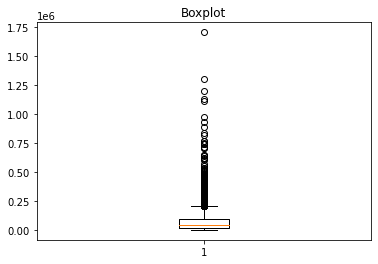

In [6]:
# We now plot the boxplot for the data using each feature independently and check for Outliers
plt.boxplot(air.Balance);plt.title('Boxplot');plt.show()

# We see that there are Outliers present for "Balance" Feature

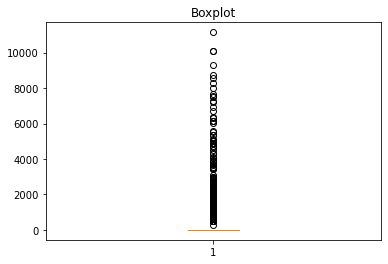

In [7]:
plt.boxplot(air.Qual_miles);plt.title('Boxplot');plt.show()  # outliers present

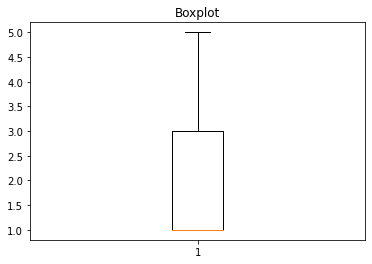

In [8]:
plt.boxplot(air.cc1_miles);plt.title('Boxplot');plt.show()  # No outliers 

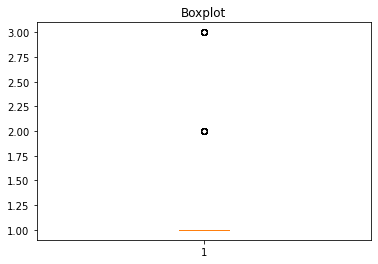

In [9]:
plt.boxplot(air.cc2_miles);plt.title('Boxplot');plt.show()  # outliers present

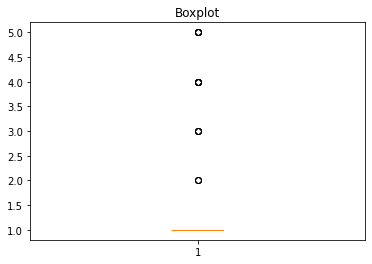

In [10]:
plt.boxplot(air.cc3_miles);plt.title('Boxplot');plt.show()  # outliers present

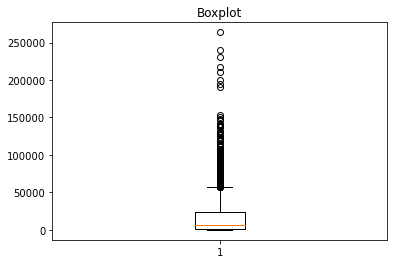

In [11]:
plt.boxplot(air.Bonus_miles);plt.title('Boxplot');plt.show()  # outliers present

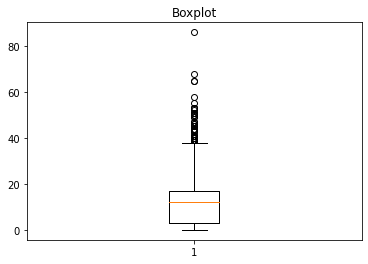

In [12]:
plt.boxplot(air.Bonus_trans);plt.title('Boxplot');plt.show()  # outliers present

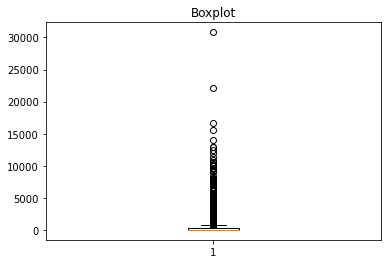

In [13]:
plt.boxplot(air.Flight_miles_12mo);plt.title('Boxplot');plt.show()  # outliers present

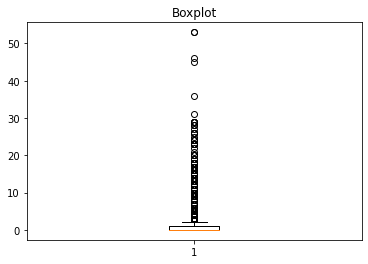

In [14]:
plt.boxplot(air.Flight_trans_12);plt.title('Boxplot');plt.show()  # outliers present

Now in order to deal with the outliers we can use one of "3R Techniques" viz:
       1. Rectify
       2. Retain
       3. Remove

In our example we choose let say to keep or retain the data, but how should we keep outliers in the data and work forward?
We use the Winsorization techniue!!! This technique helps modify the sample distribution of random variables by 
removing the outliers and replacing them with the values that constitute the 5th percentile and 95th percentile values,
i.e, all data below 5th percentile gets replaced with the value of the 5th percentile and all the values above 
95th percentile, with the 95th percentile value.

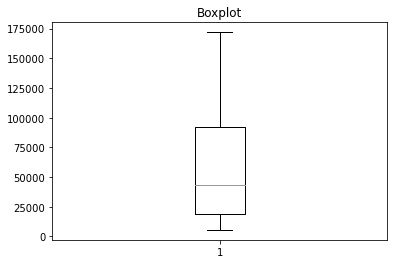

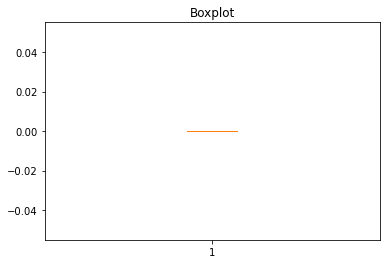

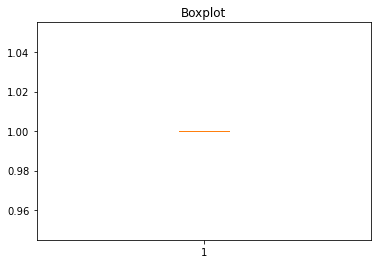

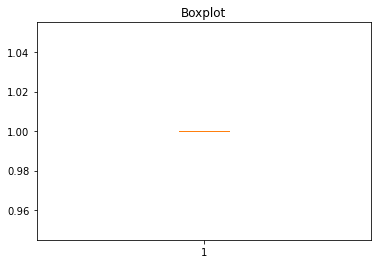

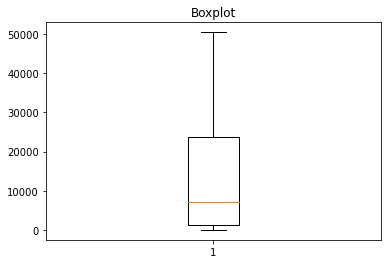

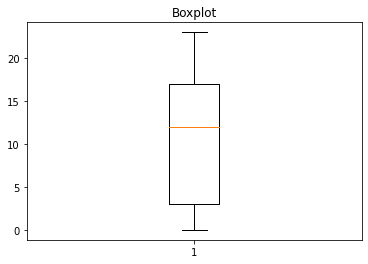

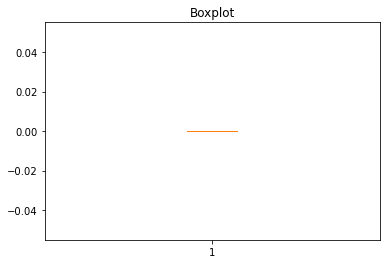

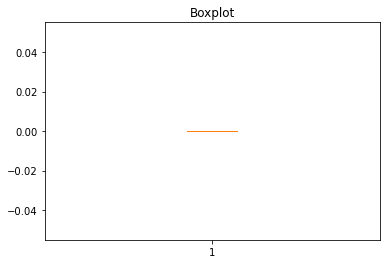

In [15]:
from scipy.stats.mstats import winsorize

air['Balance']=winsorize(air.Balance,limits=[0.07, 0.093])   
plt.boxplot(air['Balance']);plt.title('Boxplot');plt.show()

air['Qual_miles']=winsorize(air.Qual_miles,limits=[0.06, 0.094])   
plt.boxplot(air['Qual_miles']);plt.title('Boxplot');plt.show()

air['cc2_miles']=winsorize(air.cc2_miles,limits=[0.02, 0.098])   
plt.boxplot(air['cc2_miles']);plt.title('Boxplot');plt.show()

air['cc3_miles']=winsorize(air.cc3_miles,limits=[0.01, 0.099])   
plt.boxplot(air['cc3_miles']);plt.title('Boxplot');plt.show()

air['Bonus_miles']=winsorize(air.Bonus_miles,limits=[0.08, 0.092])   
plt.boxplot(air['Bonus_miles']);plt.title('Boxplot');plt.show()

air['Bonus_trans']=winsorize(air.Bonus_trans,limits=[0.01, 0.099])   
plt.boxplot(air['Bonus_trans']);plt.title('Boxplot');plt.show()

air['Flight_miles_12mo']=winsorize(air.Flight_miles_12mo,limits=[0.15, 0.85])   
plt.boxplot(air['Flight_miles_12mo']);plt.title('Boxplot');plt.show()

air['Flight_trans_12']=winsorize(air.Flight_trans_12,limits=[0.15, 0.85])   
plt.boxplot(air['Flight_trans_12']);plt.title('Boxplot');plt.show()

In [16]:
# Now we check the data for zero variance values
(air == 0).all()

ID#                  False
Balance              False
Qual_miles            True
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo     True
Flight_trans_12       True
Days_since_enroll    False
Award?               False
dtype: bool

In [17]:
# We drop the features that have zero variance values
air1 = air
air1.drop(["Qual_miles","Flight_miles_12mo","Flight_trans_12"], axis=1,inplace = True)
air1.columns

Index(['ID#', 'Balance', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles',
       'Bonus_trans', 'Days_since_enroll', 'Award?'],
      dtype='object')

In [18]:
# We see the data again now to check whether the data is in scale
air1.describe

# we notice that the data needs to be normalise, using normalization

<bound method NDFrame.describe of        ID#  Balance  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143          1          1          1          174   
1        2    19244          1          1          1          215   
2        3    41354          1          1          1         4123   
3        4    14776          1          1          1          500   
4        5    97752          4          1          1        43300   
...    ...      ...        ...        ...        ...          ...   
3994  4017    18476          1          1          1         8525   
3995  4018    64385          1          1          1          981   
3996  4019    73597          3          1          1        25447   
3997  4020    54899          1          1          1          500   
3998  4021     5500          1          1          1            0   

      Bonus_trans  Days_since_enroll  Award?  
0               1               7000       0  
1               2               6968       

In [19]:
from sklearn import preprocessing   #package for normalize
air_normalized = preprocessing.normalize(air1)
print(air_normalized)

[[3.44815547e-05 9.70414393e-01 3.44815547e-05 ... 3.44815547e-05
  2.41370883e-01 0.00000000e+00]
 [9.77144636e-05 9.40208568e-01 4.88572318e-05 ... 9.77144636e-05
  3.40437191e-01 0.00000000e+00]
 [7.11742344e-05 9.81113097e-01 2.37247448e-05 ... 9.48989792e-05
  1.66879855e-01 0.00000000e+00]
 ...
 [5.15333231e-02 9.43691958e-01 3.84672728e-05 ... 1.02579394e-04
  1.79770388e-02 1.28224243e-05]
 [7.30031962e-02 9.96965788e-01 1.81599991e-05 ... 1.81599991e-05
  2.54421587e-02 0.00000000e+00]
 [5.78140301e-01 7.90791260e-01 1.43780229e-04 ... 0.00000000e+00
  2.01004760e-01 0.00000000e+00]]


ID#                 -1.199648
Balance             -0.399134
cc1_miles           -0.748508
cc2_miles            0.000000
cc3_miles            0.000000
Bonus_miles         -0.278368
Bonus_trans         -1.273009
Days_since_enroll   -0.967505
Award?              -1.712272
dtype: float64

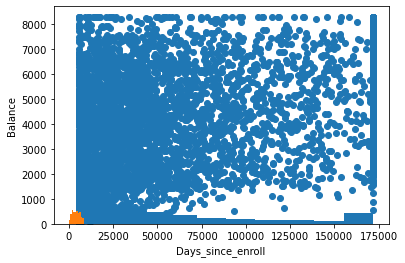

In [20]:
##########################Univariate, Bivariate################
plt.hist(air1["Balance"])   #Univariate

plt.hist(air1["Days_since_enroll"])

plt.scatter(air1["Balance"], air["Days_since_enroll"]);plt.xlabel('Days_since_enroll');plt.ylabel('Balance')   #Bivariate

air1.skew(axis = 0, skipna = True) 

air1.kurtosis(axis = 0, skipna = True)

After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

    1. Centroids of newly formed clusters do not change
    2. Points remain in the same cluster
    3. Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot. 

In [21]:
# calculating TWSS - Total within SS using different cluster range
from sklearn.cluster import KMeans

TWSS = []
k = list(range(2, 8))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(air_normalized)
    TWSS.append(kmeans.inertia_)
    
TWSS

[243.5815716904683,
 174.21050592695872,
 126.96101643195603,
 96.67551569543605,
 78.09160322987088,
 67.59042124114221]

Text(0, 0.5, 'total_within_SS')

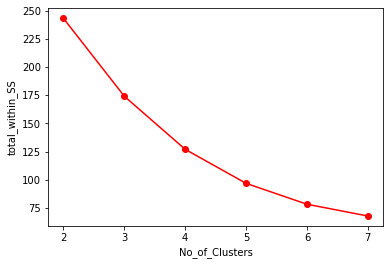

In [22]:
# Plotting the Scree plot using the TWSS from above defined function
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [31]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters, 
# as the curve is seemingly bent or showinf an elbow format at K = 4

model = KMeans(n_clusters = 4)
model.fit(air_normalized)

KMeans(n_clusters=4)

In [32]:
model.labels_ # getting the labels of clusters assigned to each row

array([3, 3, 3, ..., 1, 3, 0])

In [33]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [34]:
air1 = pd.read_excel("EastWestAirlines.xlsx","data")
air1['clust'] = mb # creating a  new column and assigning it to new column 

In [35]:
air1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [36]:
air = air1.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
air.head()

,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,3,1,28143,0,1,1,1,174,1,0,0,7000,0
1,3,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,4,14776,0,1,1,1,500,1,0,0,6952,0
4,1,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [37]:
# We can clearly see that we have the labels in the dataset in the form of a column called "clust", symbolizing the clusters

In [38]:
# In order to see the clusters we aggregate the records within the clusters and group them by the clusters to visualize the 
# 4 nos of clear cluster formed
air.iloc[:, 1:12].groupby(air.clust).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,,
0,2201.523897,7227.898897,29.080882,1.000000,1.000000,1.000000,829.773897,3.080882,75.216912,0.279412,3736.542279
1,1941.083682,99621.342259,158.640167,3.271130,1.025105,1.028452,36253.000837,18.362343,522.138912,1.562343,4257.007531
2,1927.505263,24112.665789,93.994737,3.113158,1.031579,1.036842,34303.892105,16.826316,574.371053,1.594737,4258.002632
3,2025.312234,86270.965426,178.298404,1.382979,1.008511,1.000532,6251.610638,8.714362,508.844681,1.525532,4112.912234


We can now clearly see the 4 number of clusters formed, which can be described as under

   1. Cluster1, Tier 1 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers
   2. Cluster3, Tier 2 = "3" = Defines the group of fliers that earn but and are the second most frequent fliers
   3. Cluster2, Tier 3 = "2" = Defines the group of fliers that earn the even less and are the third most frequent fliers
   4. Cluster0, Tier 4 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers